In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://api.energidataservice.dk/datastore_search_sql?sql=SELECT "HourDK", "PriceArea", "OffshoreWindPower" from "electricitybalance"'

In [3]:
r = requests.get(url)

In [4]:
d = r.json()

In [5]:
data = d['result']['records']

In [6]:
df = pd.DataFrame.from_dict(data)

In [7]:
df.set_index('HourDK', inplace=True)

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
dk1 = df[df.PriceArea == 'DK1']
dk2 = df[df.PriceArea == 'DK2']

In [10]:
dk1 = dk1.sort_index()
dk2 = dk2.sort_index()

In [11]:
dk1 = dk1.drop(['PriceArea'], axis=1)
dk2 = dk2.drop(['PriceArea'], axis=1)

In [12]:
dk1.columns = ['Offshore_dk1']
dk2.columns = ['Offshore_dk2']

In [14]:
data_done = pd.concat([dk1.resample('H').mean(), dk2.resample('H').mean()], axis=1, join='inner')

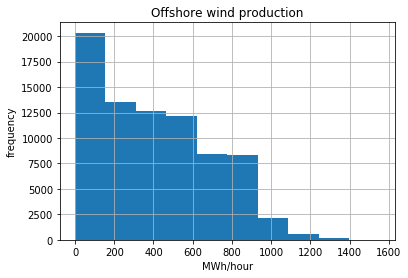

In [19]:
data_done.Offshore_dk1.hist()
plt.title('Offshore wind production')
plt.xlabel('MWh/hour')
plt.ylabel('frequency')
plt.show()

In [20]:
def log_transform(x):
    if x > 0:
        return np.log(x)
    elif x == 0: 
        return 0
    elif x < 0:
        raise Exception('Negative observation!')

In [24]:
data_done.Offshore_dk1 = data_done.Offshore_dk1.apply(lambda x: log_transform(x))

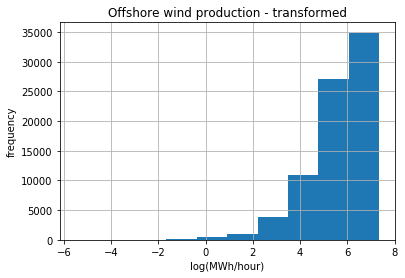

In [25]:
data_done.Offshore_dk1.hist()
plt.title('Offshore wind production - transformed')
plt.xlabel('log(MWh/hour)')
plt.ylabel('frequency')
plt.show()

In [ ]:
#old_master = pd.read_pickle('./data/master_dataset_15102019.pkl')

In [ ]:
#new_master = pd.concat([old_master, data_done.resample('H').mean()], join='inner', axis=1)

In [ ]:
#new_master.to_pickle('./data/master_dataset_24112019.pkl')